!jt -t chesterish
# !jt -r

In [1]:
from genetic_algorithm import *
from numpy.random import default_rng
from tqdm import tqdm

%matplotlib notebook

import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

import copy
from collections import Counter

In [2]:

# ## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 100

individuals = generate_initial_genomes_for_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner)

## world size
world_size_x = 120
world_size_y = 120

rng = default_rng()
x = rng.choice(world_size_x, size=nr_individuals, replace=True)
y = rng.choice(world_size_y, size=nr_individuals, replace=True)

# ## initial brain and position generator

result = calculate_individual_output_weights(individuals)

for indiv in result:
    result[indiv]['position'] = [[x[indiv], y[indiv]]]

In [3]:
nr_of_errors = 0

k = 220
n = 0
pbar = tqdm(total=k, initial=n)

while k>n: 
    pbar.update(1)
#     print('n',n)
    for indiv in result:
#         print('indiv', indiv)
        x, y = result[indiv]['position'][-1][0], result[indiv]['position'][-1][1]
        position_list = []
        for out in result[indiv]['out']:
#             if 'out' in out:
            new_pos = move(out, result[indiv]['out'][out])
            position_list.append(new_pos)
        if position_list:
            position_list = list(map(sum, zip(*position_list)))
            position_list = make_smaller_(position_list)
            position_list = list(map(sum, zip(*[[x, y]] + [position_list])))

            position_list[0] = normalize_position_if_outside_world(position_list[0], world_size_x)
            position_list[1] = normalize_position_if_outside_world(position_list[1], world_size_y)
    #         print('norm', position_list)
            result[indiv]['position'].append(position_list)
    ######### if n>=1 proceed with neurons #######        
            if n >= 1:
                apply_input(result, indiv)
            else:
                pass

    last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
#         prevent_overlap_movement(last_pos_list, result)
        
    for key_1, val_1 in last_pos_list.items():
        last_pos_list_copy = copy.copy(last_pos_list)
        del last_pos_list_copy[key_1]
        for key_2, val_2 in last_pos_list_copy.items():
            if val_1 == val_2:
                result[key_2]['position'][-1] == result[key_2]['position'][-2]

    

    n += 1
pbar.close()


100%|████████████████████████████████████████████████████████████████████████████████| 220/220 [00:02<00:00, 77.34it/s]


In [10]:
last_pos_list= [[tuple(result[obj]['position'][-1])] for obj in result]

In [11]:
from itertools import chain
Counter(chain(*last_pos_list)).most_common()

[((0, 0), 15),
 ((0, 120), 10),
 ((120, 120), 5),
 ((120, 0), 4),
 ((120, 29), 2),
 ((15, 0), 2),
 ((94, 120), 2),
 ((0, 22), 2),
 ((0, 31), 2),
 ((0, 16), 2),
 ((95, 0), 1),
 ((45, 0), 1),
 ((99, 120), 1),
 ((0, 97), 1),
 ((0, 71), 1),
 ((20, 120), 1),
 ((83, 0), 1),
 ((27, 0), 1),
 ((120, 1), 1),
 ((13, 0), 1),
 ((98, 0), 1),
 ((4, 119), 1),
 ((0, 83), 1),
 ((43, 52), 1),
 ((29, 0), 1),
 ((29, 86), 1),
 ((96, 0), 1),
 ((0, 36), 1),
 ((120, 28), 1),
 ((62, 93), 1),
 ((120, 32), 1),
 ((120, 98), 1),
 ((106, 0), 1),
 ((99, 30), 1),
 ((101, 0), 1),
 ((32, 0), 1),
 ((87, 91), 1),
 ((21, 29), 1),
 ((120, 65), 1),
 ((0, 56), 1),
 ((120, 43), 1),
 ((120, 33), 1),
 ((34, 0), 1),
 ((120, 37), 1),
 ((18, 15), 1),
 ((22, 78), 1),
 ((68, 0), 1),
 ((0, 91), 1),
 ((0, 5), 1),
 ((90, 0), 1),
 ((47, 40), 1),
 ((0, 104), 1),
 ((93, 120), 1),
 ((30, 46), 1),
 ((0, 77), 1),
 ((0, 119), 1),
 ((0, 98), 1),
 ((0, 15), 1),
 ((73, 76), 1),
 ((95, 19), 1),
 ((18, 33), 1),
 ((73, 0), 1),
 ((120, 2), 1),
 ((120

generate dictionary of coords 

In [6]:
coords = [{'x':[], 'y':[]} for key in range(len(result[indiv]['position']))]
for indiv in result:
    for pos_nr, pos in enumerate(result[indiv]['position']):
        coords[pos_nr]['x'].append(pos[0])
        coords[pos_nr]['y'].append(pos[1])

visualisation

<IPython.core.display.Javascript object>


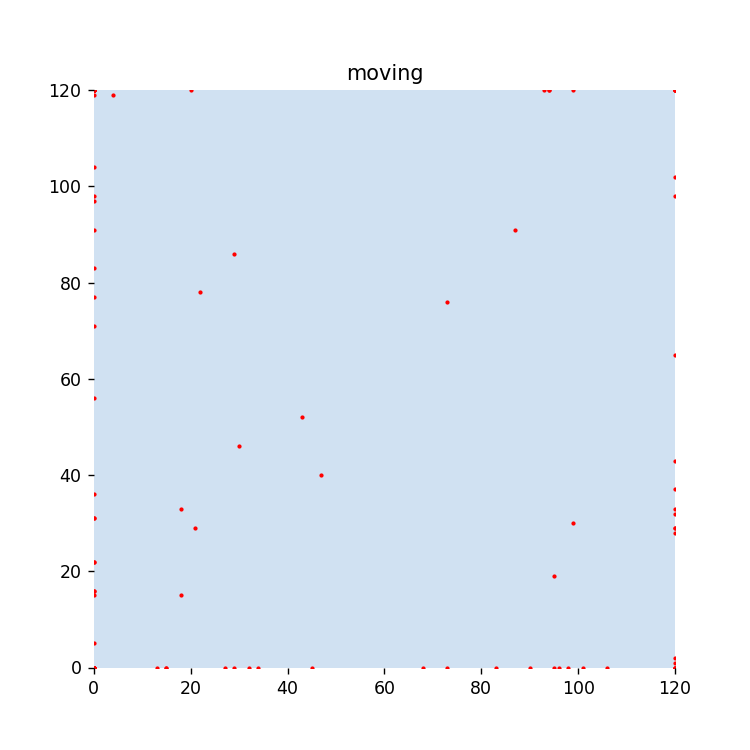

In [7]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Blues(.2))

    ax.set_xlim([0,120])
    ax.set_ylim([0,120])
    ax.set_title('moving')
    ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
    [spine.set_visible(False) for spine in ax.spines.values()] #remove chart 
    
fig, ax = plt.subplots(figsize=(6,6))
anime = FuncAnimation(
    fig = fig,
    func = update,
    frames = len(coords),
    interval = 10, repeat=False
)


### mutation

hexa to binary

In [ ]:
binary = bin(int(individuals[0][0].hex_id, 16))[2:]
if len(binary) < 32:
    factor = 32 - len(binary)
    binary = '0' * factor + binary
binary